![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [26]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Load the file
netflix_df = pd.read_csv('netflix_data.csv')
print(netflix_df.head())
print(netflix_df.columns)

  show_id  ...             genre
0      s1  ...  International TV
1      s2  ...            Dramas
2      s3  ...     Horror Movies
3      s4  ...            Action
4      s5  ...            Dramas

[5 rows x 11 columns]
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')


In [27]:
#Filter the data to remove TV shows
netflix_subset = netflix_df[netflix_df['type'] == "Movie"]

In [28]:
#Preserve only the columns of interest
netflix_movies = netflix_subset[['title', 'country', 'genre', 'release_year', 'duration']]

In [29]:
#Subset the columns of the new DataFrame
short_movies = netflix_movies[netflix_movies['duration']<60]
print(short_movies.head(20))

                                                 title  ... duration
35                                           #Rucker50  ...       56
55                 100 Things to do Before High School  ...       44
67   13TH: A Conversation with Oprah Winfrey & Ava ...  ...       37
101                                  3 Seconds Divorce  ...       53
146                                     A 3 Minute Hug  ...       28
162  A Christmas Special: Miraculous: Tales of Lady...  ...       22
171                         A Family Reunion Christmas  ...       29
177                    A Go! Go! Cory Carson Christmas  ...       22
178                    A Go! Go! Cory Carson Halloween  ...       22
179                  A Go! Go! Cory Carson Summer Camp  ...       21
181             A Grand Night In: The Story of Aardman  ...       59
200                            A Love Song for Latasha  ...       20
220                         A Russell Peters Christmas  ...       44
233                              A

In [30]:
#Assign colors to movie genres
colors = []
# Iterate over rows of netflix_movies
for label, row in netflix_movies.iterrows() :
    if row["genre"] == "Children" :
        colors.append("red")
    elif row["genre"] == "Documentaries" :
        colors.append("blue")
    elif row["genre"] == "Stand-Up":
        colors.append("green")
    else:
        colors.append("black")

# Inspect the first 10 values in your list        
colors[:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'blue']

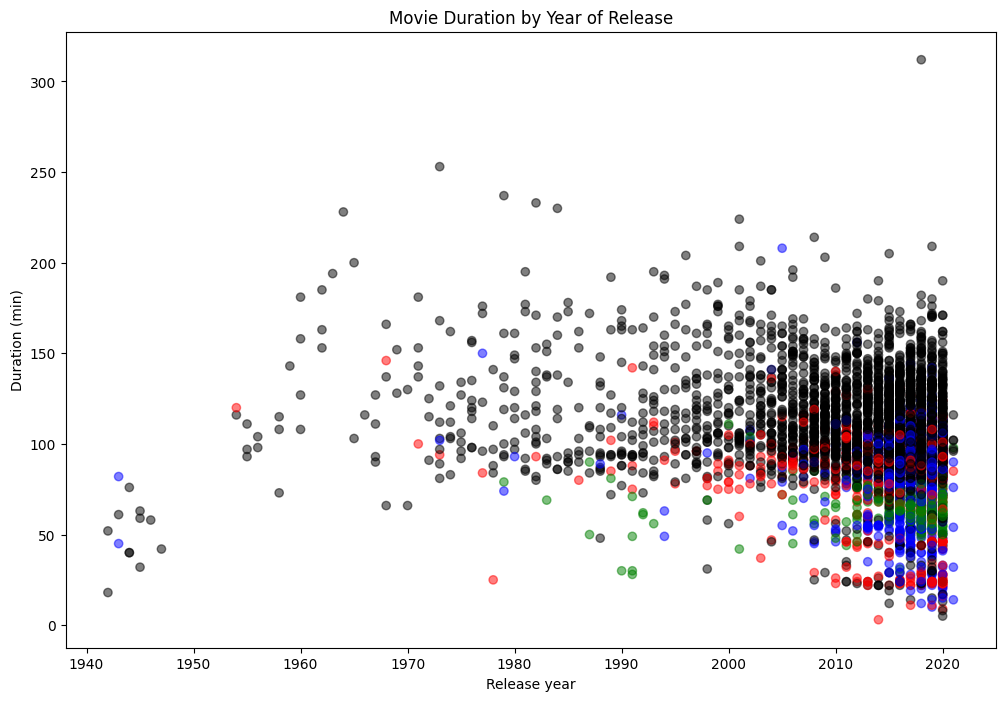

In [31]:
#Plot the movie duration by year using the genre colors created
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot
scatter = ax.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors, alpha=0.5)

# Set labels and title
ax.set_xlabel("Release year")
ax.set_ylabel("Duration (min)")
ax.set_title("Movie Duration by Year of Release")

# Show the plot
plt.show()

In [32]:
# Are we certain that movies are getting shorter?
answer = "maybe"